In [23]:
import pandas as pd
import numpy as np
import utils.process_result as process_result
import utils.visualization as vis
from utils.data import LocalDataLoader, data_summary

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# df.index

roworder_UCR = ['CBF', 'TwoPatterns',
             'ECG200', 'ECG5000','ECGFiveDays', 'TwoLeadECG',
            'GunPoint', 'CMJ',
             'PowerCons',
             'Coffee','Strawberry',
             'Car','ItalyPowerDemand', 'Plane', 
       'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'Trace',
       ]

roworder_synthetic =['SmallMiddle_CAR',
 'SmallMiddle_NARMA',
 'SmallMiddle_Harmonic',
 'SmallMiddle_PseudoPeriodic',
 'SmallMiddle_GaussianProcess',
 'RareTime_CAR',
 'RareTime_NARMA',
 'RareTime_Harmonic',
 'RareTime_PseudoPeriodic',
 'RareTime_GaussianProcess']


def rename_synthetic(df1):
    df1= df1.rename( index={'SmallMiddle_CAR': 'SM_CAR',
                            'SmallMiddle_NARMA': 'SM_NARMA',
     'SmallMiddle_Harmonic': 'SM_Harmonic',
     'SmallMiddle_PseudoPeriodic': 'SM_PseudoPeriodic',
     'SmallMiddle_GaussianProcess': 'SM_GaussianProcess',
     'RareTime_CAR':'RT_CAR',
     'RareTime_NARMA':'RT_NARMA',
     'RareTime_Harmonic':'RT_Harmonic',
     'RareTime_PseudoPeriodic':'RT_PseudoPeriodic',
     'RareTime_GaussianProcess':'RT_GaussianProcess'
                            })

    return df1

def rename_ucr(df1):
    df1= df1.rename( index={'ItalyPowerDemand': 'ItalyPower',
                            'SonyAIBORobotSurface1': 'Sony1',
     'SonyAIBORobotSurface2': 'Sony2',})
    return df1

In [98]:
df = process_result.summarize_result(synthetic_data=False, beautify_display=False)
new_order = roworder_UCR
print(len(list(df.index)) == len(new_order))

df = df.reindex(new_order)
df = rename_ucr(df)
cm = sns.light_palette("green", as_cmap=True,reverse=False)
display(df.style.background_gradient(cmap = cm,axis=1))
# df.to_csv('img/result_ucr.csv',index=True,  float_format='%.2f')


Car ['weasel', 'rocket', 'MrSEQLClassifier']
CBF ['rocket', 'resnet', 'MrSEQLClassifier', 'weasel']
Coffee ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
ECG200 ['rocket', 'knn', 'MrSEQLClassifier', 'weasel']
ECG5000 ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
ECGFiveDays ['rocket', 'resnet', 'MrSEQLClassifier', 'weasel']
GunPoint ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
ItalyPowerDemand ['weasel', 'rocket', 'resnet', 'knn', 'MrSEQLClassifier']
Plane ['rocket', 'knn', 'MrSEQLClassifier', 'weasel']
PowerCons ['weasel', 'rocket', 'resnet', 'knn']
SonyAIBORobotSurface1 ['rocket', 'resnet', 'weasel']
SonyAIBORobotSurface2 ['rocket', 'weasel']
Strawberry ['weasel', 'rocket', 'resnet', 'knn', 'MrSEQLClassifier']
Trace ['rocket', 'MrSEQLClassifier', 'weasel']
TwoLeadECG ['rocket', 'resnet', 'MrSEQLClassifier', 'weasel']
TwoPatterns ['weasel', 'rocket', 'resnet', 'knn', 'MrSEQLClassifier']
CMJ ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
T

XAI_method,random2020,GS,IG,lime_mrseql,lime_rocket,mrseql-shap,rocket-shap,mrseql,ridgecv
dataset,,,,,,,,,
CBF,0.000000,0.769653,0.724786,0.697524,0.899024,1.000000,0.842471,0.765672,0.267864
TwoPatterns,0.000000,0.858315,0.854201,0.894395,0.947204,0.834012,1.000000,0.875223,0.521674
ECG200,0.000000,0.131024,0.165495,0.670281,0.565910,0.837658,1.000000,0.455139,0.448132
ECG5000,0.000000,1.000000,0.986090,0.667413,0.574995,0.606866,0.822037,0.304736,0.289590
ECGFiveDays,0.538146,0.771850,0.714809,0.390926,0.540286,0.908303,1.000000,0.000000,0.269101
TwoLeadECG,0.394342,0.170521,0.177673,0.443312,0.403953,0.920850,1.000000,0.052744,0.000000
GunPoint,0.813792,0.737581,1.000000,0.769659,0.000000,0.924197,0.843958,0.890853,0.562055
CMJ,0.237291,0.059395,0.000000,0.988336,0.559357,1.000000,0.838887,0.901525,0.305636
PowerCons,0.495282,0.692872,0.679170,0.373827,0.760607,0.453672,1.000000,0.000000,0.661478


In [75]:
# GET long table for Critical diagram 

df = process_result.summarize_result(synthetic_data=False,wide_table=False)

conditions = [
    df['XAI_method']=='GS',
    df['XAI_method']=='IG',
    df['XAI_method']=='lime_mrseql',
    df['XAI_method']=='lime_rocket',
    df['XAI_method']=='rocket-shap',
    df['XAI_method']=='mrseql-shap',
    df['XAI_method']=='random2020',
    df['XAI_method']=='ridgecv',
    df['XAI_method']=='mrseql',]

values = ['GradientSHAP', 'Int Gradient', 'MrSEQL-LIME', 'ROCKET-LIME', 'ROCKET-SHAP', 'MrSEQL-SHAP', 'Random',
         'RidgeCV-SM', 'MrSEQL-SM']

df['XAI_method'] = np.select(conditions, values)

# df.to_csv('img/result_ucr_longtable.csv',index=False,  float_format='%.5f')

df

,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power
0,Car,GradientSHAP,0.696946,0.854589,0.145411
1,Car,Int Gradient,0.772522,1.000000,0.000000
2,Car,MrSEQL-LIME,0.556206,0.583799,0.416201
3,Car,ROCKET-LIME,0.583798,0.636887,0.363113
4,Car,MrSEQL-SM,0.602676,0.673210,0.326790
...,...,...,...,...,...
4,CMJ,MrSEQL-SM,0.163210,0.098475,0.901525
5,CMJ,MrSEQL-SHAP,0.090130,0.000000,1.000000
6,CMJ,Random,0.656147,0.762709,0.237291
7,CMJ,RidgeCV-SM,0.605428,0.694364,0.305636


In [99]:
df = process_result.summarize_result(synthetic_data=True, beautify_display=False)
new_order = roworder_synthetic
print(len(list(df.index)) == len(new_order))

df = df.reindex(new_order)
df = rename_df(df)
cm = sns.light_palette("green", as_cmap=True,reverse=False)
display(df.style.background_gradient(cmap = cm,axis=1))
# df.to_csv('img/result_synthetic.csv',index=True,  float_format='%.2f')


SmallMiddle_CAR ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
SmallMiddle_NARMA ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
SmallMiddle_Harmonic ['rocket', 'resnet', 'knn', 'weasel']
SmallMiddle_PseudoPeriodic ['rocket', 'resnet', 'knn', 'weasel']
SmallMiddle_GaussianProcess ['rocket', 'resnet', 'knn', 'weasel']
RareTime_CAR ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
RareTime_NARMA ['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
RareTime_Harmonic ['rocket', 'resnet', 'knn', 'weasel']
RareTime_PseudoPeriodic ['rocket', 'resnet', 'knn', 'weasel']
RareTime_GaussianProcess ['rocket', 'knn', 'weasel']
True


XAI_method,random2020,GS,IG,lime_mrseql,lime_rocket,mrseql-shap,rocket-shap,mrseql,ridgecv,GT
dataset,,,,,,,,,,
SM_CAR,0.000000,0.734459,0.729114,0.394765,0.575577,0.716551,0.755808,0.310708,0.789415,1.000000
SM_NARMA,0.000000,0.608273,0.617207,0.332930,0.449698,0.642863,0.714689,0.303334,0.782755,1.000000
SM_Harmonic,0.000000,0.865512,0.863217,0.261703,0.535556,0.409029,0.759505,0.527351,0.905817,1.000000
SM_PseudoPeriodic,0.000000,0.831931,0.835244,0.283573,0.530793,0.403649,0.767309,0.209245,0.849466,1.000000
SM_GaussianProcess,0.000000,0.425367,0.525591,0.248671,0.538219,0.228531,0.804476,0.475596,0.503076,1.000000
RT_CAR,0.000000,0.921072,0.931917,0.805059,0.805994,0.850842,0.847494,0.144515,0.954059,1.000000
RT_NARMA,0.000000,0.903030,0.922358,0.789567,0.612125,0.848349,0.839431,0.165527,0.933437,1.000000
RT_Harmonic,0.000000,0.928292,0.939630,0.320045,0.650823,0.554116,0.840066,0.495645,1.000000,0.939771
RT_PseudoPeriodic,0.000000,0.916222,0.964149,0.277841,0.794424,0.540409,0.918242,0.339378,0.971563,1.000000


In [18]:

df = process_result.get_accuracy(synthetic_data=False)
new_order = roworder_UCR
print(len(list(df.index)) == len(new_order))

df = df.reindex(new_order)
df = rename_ucr(df)
# cm = sns.light_palette("green", as_cmap=True,reverse=False)
# display(df.style.background_gradient(cmap = cm,axis=1))
# df.to_csv('img/accuracy_ucr.csv',index=True,  float_format='%.2f')
df

['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']
True


Referee,MrSEQLClassifier,knn,resnet,rocket,weasel
dataset,,,,,
CBF,0.998889,0.852222,0.972222,1.000000,0.982222
TwoPatterns,0.998250,0.906750,0.993750,1.000000,0.997250
ECG200,0.890000,0.880000,0.830000,0.900000,0.890000
ECG5000,0.942889,0.924889,0.921778,0.948000,0.948222
ECGFiveDays,0.995354,0.796748,0.923345,1.000000,0.972125
TwoLeadECG,0.992976,0.747147,0.939421,0.999122,0.999122
GunPoint,0.993333,0.913333,0.966667,1.000000,1.000000
CMJ,0.960894,0.921788,0.916201,0.966480,0.966480
PowerCons,0.877778,0.977778,0.911111,0.955556,0.927778


In [94]:

def get_explanation_power_by_ref(ds):
    ref_list = process_result._get_referee_list_with_criteria(ds)

    ref = ref_list[0]
    df1 = process_result.xai_average_ranking(ds, referees=[ref], 
                                           ranking_by_perturbation_method=False, 
                                           display_detail=False,)
    df1['referee'] =ref

    for ref in ref_list[1:]:
        df = process_result.xai_average_ranking(ds, referees=[ref], 
                                           ranking_by_perturbation_method=False, 
                                           display_detail=False)

        df['referee'] =ref
        df1 = pd.concat([df,df1], ignore_index=True, axis=0)

    return df1




In [170]:
# get_explanation_power_by_ref('RareTime_NARMA')

In [24]:
ds ='CMJ'
df = process_result._get_accuracy_one_ds(ds)
df
# df.to_csv('img/accuracy_synthetic.csv',index=True,  float_format='%.2f')

ref_list = df[df['metrics: acc']>= 0.8]['Referee']
ref_list = list(ref_list)
ref_list

['rocket', 'resnet', 'knn', 'MrSEQLClassifier', 'weasel']

In [25]:
np.average(df['metrics: acc'])

0.9463687150837992

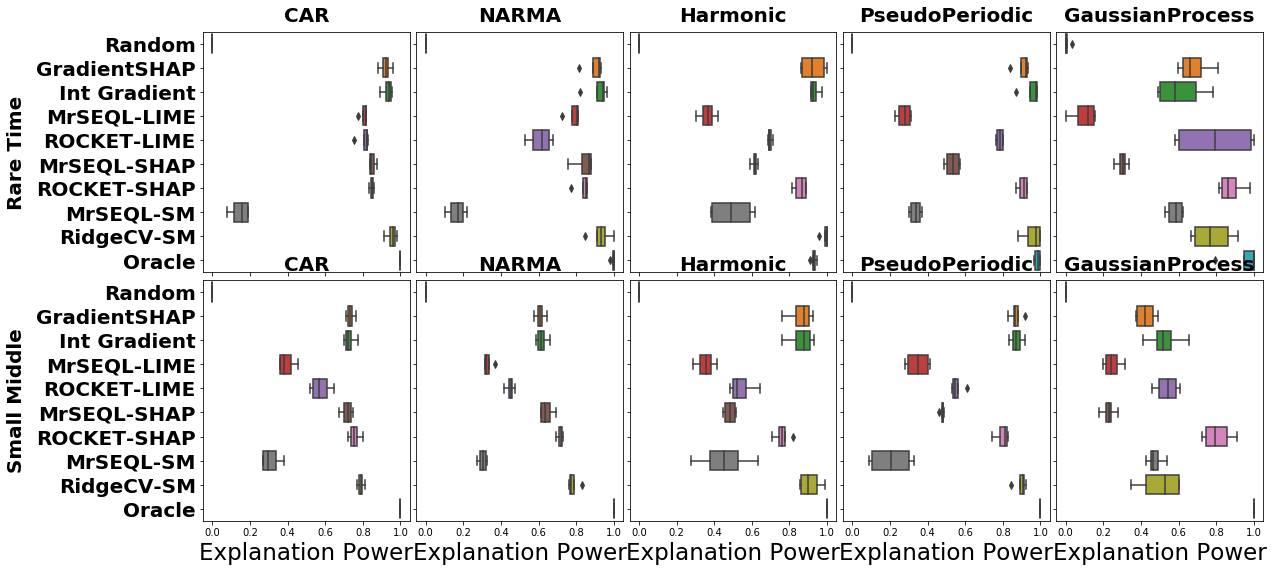

In [86]:
salient_regions=['RareTime', 'SmallMiddle']
salient_regions_name=['Rare Time', 'Small Middle',]
processes = ['CAR', 'NARMA','Harmonic', 'PseudoPeriodic', 'GaussianProcess']
fsize,padsize,legendsize= 20,10,8
ticksize,labelsize =20,18

order = ['random2020','GS','IG',
         'lime_mrseql','lime_rocket',
         'mrseql-shap','rocket-shap',
         'mrseql', 'ridgecv', 'GT']
label =['Random', 'GradientSHAP', 'Int Gradient',
       'MrSEQL-LIME', 'ROCKET-LIME',
       'MrSEQL-SHAP','ROCKET-SHAP',
       'MrSEQL-SM', 'RidgeCV-SM', 'Oracle']

nr,nc = 2,5    
size = 3
fig, axes = plt.subplots(nr, nc, figsize=(size*nc+4,size*nr+3),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.125/4, wspace=0.125/4)
for i, region in enumerate(salient_regions):
    for j, process in enumerate(processes):
        ds = '_'.join((region,process))
        df = process_result._get_accuracy_one_ds(ds)

        ref_list = df[df['metrics: acc']>= 0.8]['Referee']
        ref_list = list(ref_list)
        df = process_result.xai_average_ranking(ds, referees=ref_list, 
                                   ranking_by_perturbation_method=True, 
                                   display_detail=False)
        g1 = sns.boxplot(ax=axes[i, j], data=df, y='XAI_method', x='explanation_power',order=order,orient='h')
        g1.set(xlabel=None)
        g1.set(ylabel=None)
        axes[i,j].set_yticklabels(label ,size=ticksize, weight='bold')
#         axes[i,j]
        if i==0: axes[i,j].set_title(processes[j], fontsize=fsize, pad=padsize, weight='bold') 
        if j==0: 
            axes[i,j].set_ylabel(salient_regions_name[i], fontsize=fsize, labelpad=padsize,weight='bold')
        if i==nr-1:
                axes[i,j].set_xlabel('Explanation Power', fontsize=labelsize)
            

plt.savefig('img/synthetic-result-bymasking', dpi=300, bbox_inches='tight')
        

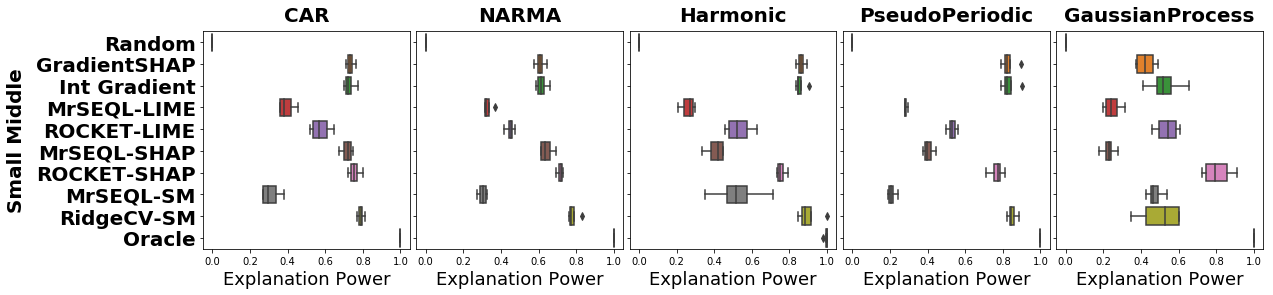

In [93]:
salient_regions=['RareTime', 'SmallMiddle']
salient_regions_name=['Rare Time', 'Small Middle',]
processes = ['CAR', 'NARMA','Harmonic', 'PseudoPeriodic', 'GaussianProcess']
fsize,padsize,legendsize= 20,10,8
ticksize,labelsize =20,18

order = ['random2020','GS','IG',
         'lime_mrseql','lime_rocket',
         'mrseql-shap','rocket-shap',
         'mrseql', 'ridgecv', 'GT']
label =['Random', 'GradientSHAP', 'Int Gradient',
       'MrSEQL-LIME', 'ROCKET-LIME',
       'MrSEQL-SHAP','ROCKET-SHAP',
       'MrSEQL-SM', 'RidgeCV-SM', 'Oracle']

nr,nc = 1,5    
size = 3
fig, axes = plt.subplots(nr, nc, figsize=(19,4),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.125/4, wspace=0.125/4)


for j, process in enumerate(processes):
        ds = '_'.join((salient_regions[-1],process))
        ref_list = process_result._get_referee_list_with_criteria(ds)
        df = process_result.xai_average_ranking(ds, referees=ref_list, 
                                   ranking_by_perturbation_method=True, 
                                   display_detail=False)
        g1 = sns.boxplot(ax=axes[j], data=df, y='XAI_method', x='explanation_power',order=order,orient='h')
        g1.set(xlabel=None)
        g1.set(ylabel=None)
        axes[j].set_yticklabels(label ,size=ticksize, weight='bold')
        axes[j].set_title(processes[j], fontsize=fsize, pad=padsize, weight='bold') 
        if j==0: axes[j].set_ylabel(salient_regions_name[i], fontsize=fsize, labelpad=padsize,weight='bold')
        axes[j].set_xlabel('Explanation Power', fontsize=labelsize)

        
plt.savefig('img/synthetic-result-bymasking-main', dpi=300, bbox_inches='tight')


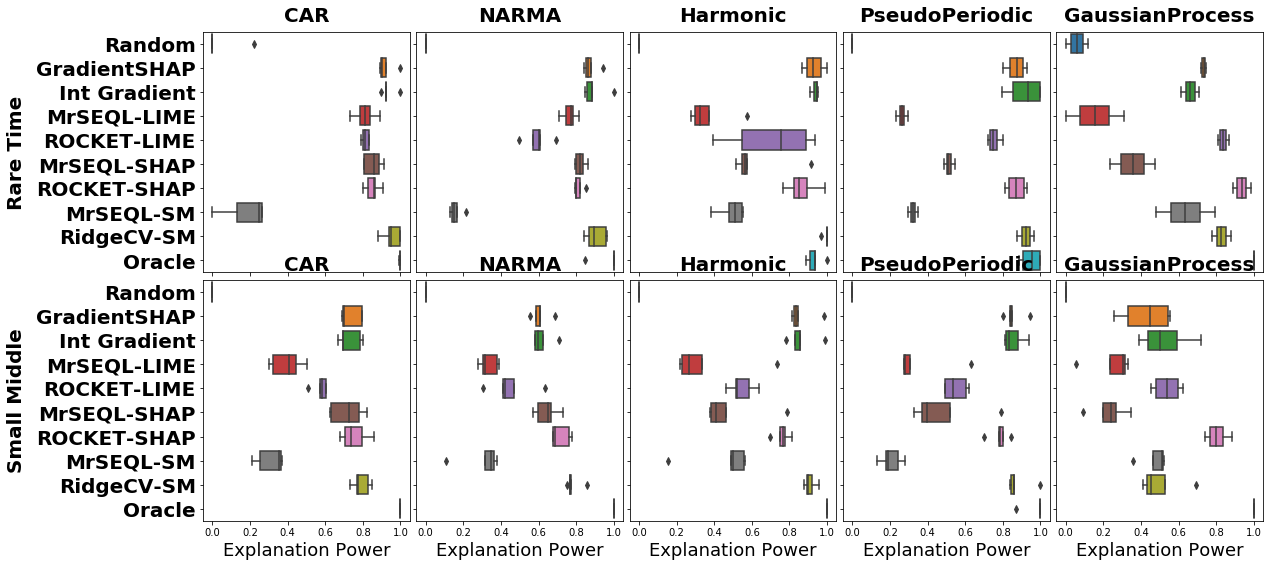

In [85]:
salient_regions=['RareTime', 'SmallMiddle']
salient_regions_name=['Rare Time', 'Small Middle',]

processes = ['CAR', 'NARMA','Harmonic', 'PseudoPeriodic', 'GaussianProcess']
fsize,padsize,legendsize= 20,10,8
ticksize,labelsize =20,18
order = ['random2020','GS','IG',
         'lime_mrseql','lime_rocket',
         'mrseql-shap','rocket-shap',
         'mrseql', 'ridgecv', 'GT']
label =['Random', 'GradientSHAP', 'Int Gradient',
       'MrSEQL-LIME', 'ROCKET-LIME',
       'MrSEQL-SHAP','ROCKET-SHAP',
       'MrSEQL-SM', 'RidgeCV-SM', 'Oracle']

nr,nc = 2,5
size = 3
fig, axes = plt.subplots(nr, nc, figsize=(size*nc+4,size*nr+3),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.125/4, wspace=0.125/4)

# fig.suptitle('Explanation Power Boxplot by Pertubation Type')
for i, region in enumerate(salient_regions):
    for j, process in enumerate(processes):
        ds = '_'.join((region,process))
#         df = process_result._get_accuracy_one_ds(ds)
        df = get_explanation_power_by_ref(ds)
        g1 = sns.boxplot(ax=axes[i, j], data=df, y='XAI_method', x='explanation_power',order=order,orient='h')
        g1.set(xlabel=None)
        g1.set(ylabel=None)
#         print(df)
        axes[i,j].set_yticklabels(label ,size=ticksize,weight='bold')
#         axes[i,j]
#         if i==0: 
        axes[i,j].set_title(processes[j], fontsize=fsize, pad=padsize,weight='bold') 
        if j==0: 
            axes[i,j].set_ylabel(salient_regions_name[i], fontsize=fsize, labelpad=padsize,weight='bold')
        if i==nr-1:
            axes[i,j].set_xlabel('Explanation Power', fontsize=labelsize)


plt.savefig('img/synthetic-result-byref', dpi=300,bbox_inches='tight')
        

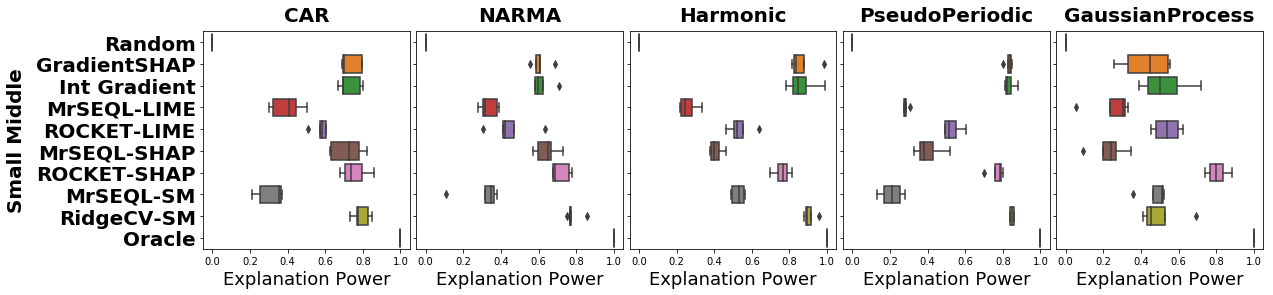

In [96]:
salient_regions=['RareTime', 'SmallMiddle']
salient_regions_name=['Rare Time', 'Small Middle',]

processes = ['CAR', 'NARMA','Harmonic', 'PseudoPeriodic', 'GaussianProcess']
fsize,padsize,legendsize= 20,10,8
ticksize,labelsize =20,18
order = ['random2020','GS','IG',
         'lime_mrseql','lime_rocket',
         'mrseql-shap','rocket-shap',
         'mrseql', 'ridgecv', 'GT']
label =['Random', 'GradientSHAP', 'Int Gradient',
       'MrSEQL-LIME', 'ROCKET-LIME',
       'MrSEQL-SHAP','ROCKET-SHAP',
       'MrSEQL-SM', 'RidgeCV-SM', 'Oracle']

fig, axes = plt.subplots(nr, nc, figsize=(19,4),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.125/4, wspace=0.125/4)


for j, process in enumerate(processes):
        ds = '_'.join((salient_regions[-1],process))
        df = get_explanation_power_by_ref(ds)
        g1 = sns.boxplot(ax=axes[j], data=df, y='XAI_method', x='explanation_power',order=order,orient='h')
        g1.set(xlabel=None)
        g1.set(ylabel=None)
        axes[j].set_xlabel('Explanation Power', fontsize=labelsize)

        axes[j].set_yticklabels(label ,size=ticksize,weight='bold')
        axes[j].set_title(processes[j], fontsize=fsize, pad=padsize,weight='bold') 
        if j==0: 
            axes[j].set_ylabel(salient_regions_name[i], fontsize=fsize, labelpad=padsize,weight='bold')


plt.savefig('img/synthetic-result-byref-main', dpi=300,bbox_inches='tight')
        

In [ ]:

plt.savefig('img/synthetic-result-bymasking', dpi=300)
        

In [47]:

def get_explanation_power(ds):
    df = process_result._get_accuracy_one_ds(ds)
    print(df)
    ref_list = df[df['metrics: acc']>= 0.8]['Referee']
    ref_list = list(ref_list)
    print(ref_list)
    print('###'*20)

    ref = ref_list[0]
    df1 = process_result.xai_average_ranking(ds, referees=ref_list, 
                                           ranking_by_perturbation_method=False, 
                                           display_detail=False)
    return df1




          dataset  noise_type XAI_method           Referee  threshold  \
55    BeepTest017  local_mean    ridgecv            rocket          0   
451   BeepTest017  local_mean    ridgecv            resnet          0   
847   BeepTest017  local_mean    ridgecv               knn          0   
1243  BeepTest017  local_mean    ridgecv  MrSEQLClassifier          0   
1639  BeepTest017  local_mean    ridgecv            weasel          0   

      metrics: acc  
55        0.970588  
451       0.867647  
847       0.757353  
1243      0.816176  
1639      0.955882  
['rocket', 'resnet', 'MrSEQLClassifier', 'weasel']
############################################################


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power
0,BeepTest017,GS,0.668615,0.830654,0.169346
1,BeepTest017,IG,0.683257,0.854482,0.145518
2,BeepTest017,lime_mrseql,0.772675,1.000000,0.000000
3,BeepTest017,lime_rocket,0.337851,0.292373,0.707627
4,BeepTest017,mrseql,0.522727,0.593238,0.406762
5,BeepTest017,mrseql-shap,0.382036,0.364280,0.635720
6,BeepTest017,random2020,0.158192,0.000000,1.000000
7,BeepTest017,ridgecv,0.517433,0.584623,0.415377
8,BeepTest017,rocket-shap,0.582531,0.690563,0.309437


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power
0,BeepTest017,GS,0.104485,0.070088,0.929912
1,BeepTest017,IG,0.297650,0.317544,0.682456
2,BeepTest017,lime_mrseql,0.521468,0.604266,0.395734
3,BeepTest017,lime_rocket,0.540919,0.629184,0.370816
4,BeepTest017,mrseql,0.338057,0.369306,0.630694
5,BeepTest017,mrseql-shap,0.598845,0.703391,0.296609
6,BeepTest017,random2020,0.049774,0.000000,1.000000
7,BeepTest017,ridgecv,0.766264,0.917864,0.082136
8,BeepTest017,rocket-shap,0.830381,1.000000,0.000000


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power
0,BeepTest017,GS,0.500443,0.635341,0.364659
1,BeepTest017,IG,0.747238,0.989046,0.010954
2,BeepTest017,lime_mrseql,0.217741,0.230176,0.769824
3,BeepTest017,lime_rocket,0.410899,0.507008,0.492992
4,BeepTest017,mrseql,0.076898,0.028322,0.971678
5,BeepTest017,mrseql-shap,0.057137,0.000000,1.000000
6,BeepTest017,random2020,0.657068,0.859814,0.140186
7,BeepTest017,ridgecv,0.754882,1.000000,0.000000
8,BeepTest017,rocket-shap,0.710338,0.936161,0.063839


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power
0,BeepTest017,GS,0.578805,0.632776,0.367224
1,BeepTest017,IG,0.833038,0.957938,0.042062
2,BeepTest017,lime_mrseql,0.865925,1.000000,0.000000
3,BeepTest017,lime_rocket,0.690622,0.775789,0.224211
4,BeepTest017,mrseql,0.670743,0.750364,0.249636
5,BeepTest017,mrseql-shap,0.608211,0.670386,0.329614
6,BeepTest017,random2020,0.206304,0.156349,0.843651
7,BeepTest017,ridgecv,0.199869,0.148119,0.851881
8,BeepTest017,rocket-shap,0.084060,0.000000,1.000000


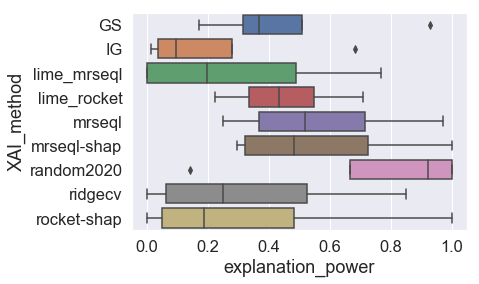

In [109]:
ds = 'BeepTest017'
df1 = get_explanation_power_by_ref(ds, threshold = 0.8)
sns.boxplot(data=df1, y='XAI_method', x='explanation_power',orient='h')

In [84]:

df = process_result._get_accuracy_one_ds(ds)
    
for ds in  ['BeepTest007','BeepTest008','BeepTest017','BeepTest018']:
    
    df = process_result._get_accuracy_one_ds(ds)
    print(df)

          dataset  noise_type XAI_method           Referee  threshold  \
55    BeepTest007  local_mean    ridgecv            rocket          0   
451   BeepTest007  local_mean    ridgecv            resnet          0   
847   BeepTest007  local_mean    ridgecv               knn          0   
1243  BeepTest007  local_mean    ridgecv  MrSEQLClassifier          0   
1639  BeepTest007  local_mean    ridgecv            weasel          0   

      metrics: acc  
55            1.00  
451           0.82  
847           0.86  
1243          0.92  
1639          0.92  
          dataset  noise_type XAI_method           Referee  threshold  \
55    BeepTest008  local_mean    ridgecv            rocket          0   
451   BeepTest008  local_mean    ridgecv            resnet          0   
847   BeepTest008  local_mean    ridgecv               knn          0   
1243  BeepTest008  local_mean    ridgecv  MrSEQLClassifier          0   
1639  BeepTest008  local_mean    ridgecv            weasel          0 

In [67]:
ds_list = ['BeepTest007','BeepTest008','BeepTest017','BeepTest018']
threshold = 0.95
for ds in ds_list:
# print(ds)
    df = process_result._get_accuracy_one_ds(ds)
#     print(df)
#     ref_list = df[df['metrics: acc']>= threshold]['Referee']
#     ref_list = list(ref_list)
#     if 'weasel' in ref_list:
#         ref_list.remove('weasel')
    ref_list =['rocket',      'MrSEQLClassifier','knn','ridgecv']
#     print(ref_list)
    x = process_result.xai_average_ranking(ds, referees=ref_list, 
                                           ranking_by_perturbation_method=False, 
                                           display_detail=True)
#     x.to_csv('img/%s_result.csv' %ds, index=False)
#     print(x)

,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power,ranking
0,BeepTest007,GS,0.443496,0.407665,0.592335,4.000000
1,BeepTest007,IG,0.321573,0.105586,0.894414,2.000000
2,BeepTest007,lime_mrseql,0.474203,0.483746,0.516254,5.000000
3,BeepTest007,lime_rocket,0.565967,0.711102,0.288898,8.000000
4,BeepTest007,mrseql,0.541900,0.651473,0.348527,7.000000
5,BeepTest007,mrseql-shap,0.322525,0.107944,0.892056,3.000000
6,BeepTest007,random2020,0.529961,0.621894,0.378106,6.000000
7,BeepTest007,ridgecv,0.682570,1.000000,0.000000,9.000000
8,BeepTest007,rocket-shap,0.278957,0.000000,1.000000,1.000000


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power,ranking
0,BeepTest008,GS,0.235363,0.098095,0.901905,4.000000
1,BeepTest008,IG,0.169051,0.000000,1.000000,1.000000
2,BeepTest008,lime_mrseql,0.439803,0.400521,0.599479,6.000000
3,BeepTest008,lime_rocket,0.339929,0.252778,0.747222,5.000000
4,BeepTest008,mrseql,0.575622,0.601437,0.398563,7.000000
5,BeepTest008,mrseql-shap,0.187120,0.026730,0.973270,2.000000
6,BeepTest008,random2020,0.741622,0.846999,0.153001,8.000000
7,BeepTest008,ridgecv,0.845051,1.000000,0.000000,9.000000
8,BeepTest008,rocket-shap,0.199656,0.045274,0.954726,3.000000


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power,ranking
0,BeepTest017,GS,0.609243,0.730233,0.269767,6.000000
1,BeepTest017,IG,0.742111,1.000000,0.000000,9.000000
2,BeepTest017,lime_mrseql,0.641919,0.796576,0.203424,7.000000
3,BeepTest017,lime_rocket,0.249583,0.000000,1.000000,1.000000
4,BeepTest017,mrseql,0.421664,0.349384,0.650616,3.000000
5,BeepTest017,mrseql-shap,0.293246,0.088651,0.911349,2.000000
6,BeepTest017,random2020,0.561006,0.632295,0.367705,4.000000
7,BeepTest017,ridgecv,0.721302,0.957752,0.042248,8.000000
8,BeepTest017,rocket-shap,0.606629,0.724926,0.275074,5.000000


,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power,ranking
0,BeepTest018,GS,0.762403,0.846091,0.153909,6.000000
1,BeepTest018,IG,0.788417,0.880118,0.119882,8.000000
2,BeepTest018,lime_mrseql,0.327948,0.277811,0.722189,3.000000
3,BeepTest018,lime_rocket,0.367866,0.330024,0.669976,4.000000
4,BeepTest018,mrseql,0.491197,0.491345,0.508655,5.000000
5,BeepTest018,mrseql-shap,0.115559,0.000000,1.000000,1.000000
6,BeepTest018,random2020,0.773638,0.860788,0.139212,7.000000
7,BeepTest018,ridgecv,0.880067,1.000000,0.000000,9.000000
8,BeepTest018,rocket-shap,0.199202,0.109408,0.890592,2.000000


In [ ]:
data = LocalDataLoader(ds_dir,ds)
X_train,y_train,X_test,y_test = data.get_X_y()


In [ ]:
df.boxplot(by='XAI_method', column = 'explanation_power', rot=45, grid=False)

## Get all dataset names

In [ ]:
from os import listdir
from os.path import isfile, join

df = pd.read_csv('dataset-1.csv')
mypath = './model'
onlyfiles = [f.split('_')[0] for f in listdir(mypath) if isfile(join(mypath, f))]
x = df[df['Column2'].isin(onlyfiles)]
x = x.drop(['Column1','Column3','Column4','Column10','Column11'], axis=1)
x = x.rename(columns={"Column2": "dataset", "Column5": "train","Column6": "test","Column7": "n_timestep",
                  "Column8": "n_classes","Column9": "type"})



In [ ]:
ds_list = ['Car',
'CBF',
'Coffee',
'ECG200',
'ECG5000',
'ECGFiveDays',
'GunPoint',
'GunPointAgeSpan',
'GunPointMaleVersusFemale',
'GunPointOldVersusYoung',
'ItalyPowerDemand',
'Meat',
'MoteStrain',
'Plane',
'PowerCons',
'SonyAIBORobotSurface1',
'SonyAIBORobotSurface2',
'Strawberry',
'Trace',
'TwoLeadECG',
'TwoPatterns',
'Wafer',
'WormsTwoClass',
'CMJ',]

In [17]:
# for synthetic data
import itertools
from itertools import product

list_1 = ['SmallMiddle_', 'RareTime_', ]
list_2 = ['CAR', 'NARMA', 'Harmonic', 'PseudoPeriodic', 'GaussianProcess']

output = list(product(list_1, list_2))
ds_list = []
for i1, i2 in output:
    ds_list.append(''.join((i1,i2)))

ds_dir = 'data'

ds_list


['SmallMiddle_CAR',
 'SmallMiddle_NARMA',
 'SmallMiddle_Harmonic',
 'SmallMiddle_PseudoPeriodic',
 'SmallMiddle_GaussianProcess',
 'RareTime_CAR',
 'RareTime_NARMA',
 'RareTime_Harmonic',
 'RareTime_PseudoPeriodic',
 'RareTime_GaussianProcess']

In [ ]:

def xai_average_ranking(ds,referees=None,ranking_by_perturbation_method=False,
                                        display_detail=False):
    colnames = ['dataset','best','worst']
    df = pd.DataFrame(columns=colnames)

    auc_df = load_xais_comparison_output(ds)
    
    x = process_auc_df(auc_df,referees=referees,
                            ranking_by_perturbation_method=ranking_by_perturbation_method, 
                            beautify_display=True)
    x['explanation_power'] = 1-x['scaled_ranking']
    x['ranking'] = x.groupby('dataset')['scaled_ranking'].rank(ascending=True)

    # curr_best = x['XAI_method'][x['scaled_ranking'].idxmin()] 
    # curr_worst = x['XAI_method'][x['scaled_ranking'].idxmax()]
    # df = df.append({'dataset': ds,
    #                'best':curr_best,
    #                 'worst':curr_worst,
    #                }, ignore_index=True)
    # # print(df)
    if display_detail:
        print(x)
    return x
